# Supervised Learning - Classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/water_potability.csv')

In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
data=data.rename(columns={'ph': 'pH'})

In [ ]:
data.describe()

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
data.shape

(3276, 10)

##Data cleaning

In [ ]:
#checking if theres any null values and missing values
data.isnull().sum()

,0
pH,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [ ]:
# filling null values with meadian using imputer method

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


In [ ]:
data.isnull().sum()

,0
pH,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [ ]:
#defining a fucntion to remove outliers
def remove_outliers_iqr(data):
    for col in data.select_dtypes(include=np.number).columns[:-1]:  # skip Potability
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

In [ ]:
data = remove_outliers_iqr(data)

In [ ]:
data.shape

(2657, 10)

Outliers were removed

## EDA (Exploratory Data Analysis)

<ipython-input-75-b6bb032bab27>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Potability',palette='Set1')   # 0 is for not drinkable and 1 is for drinkable


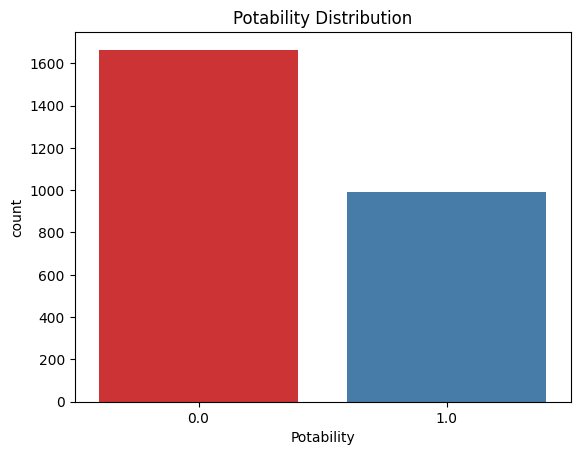

In [ ]:
sns.countplot(data=data, x='Potability',palette='Set1')   # 0 is for not drinkable and 1 is for drinkable
plt.title("Potability Distribution")
plt.show()

<ipython-input-76-5d591bfe5ad5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='pastel')
<ipython-input-76-5d591bfe5ad5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='pastel')
<ipython-input-76-5d591bfe5ad5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='pastel')
<ipython-input-76-5d591bfe5ad5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same ef

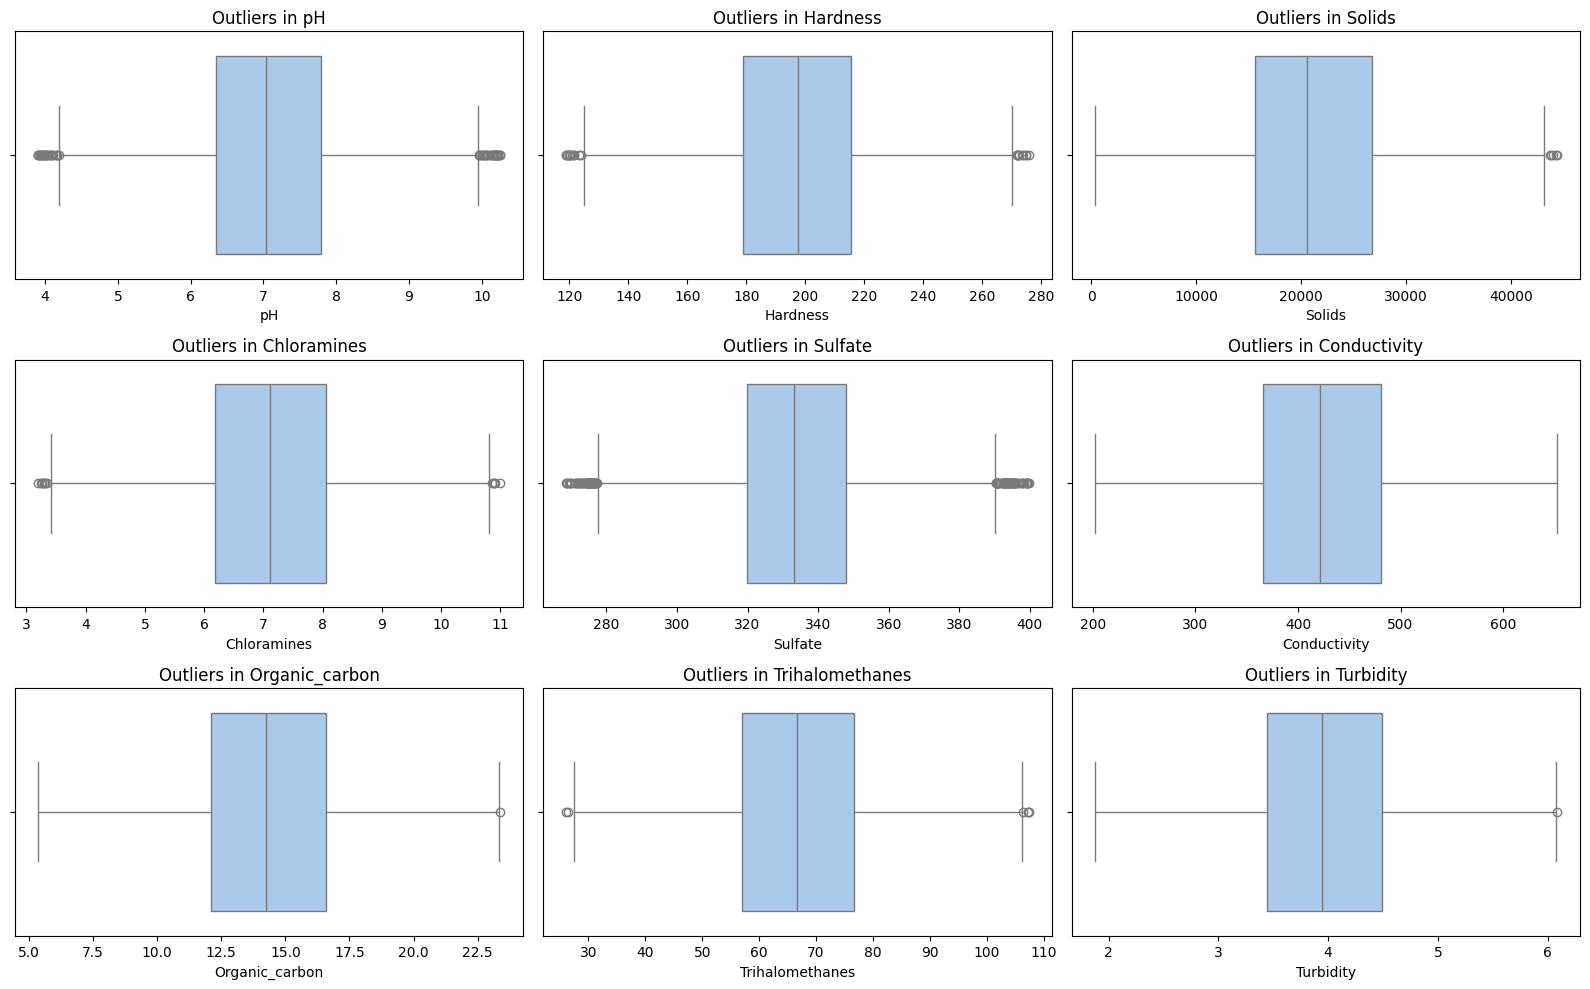

In [ ]:
num_cols = data.select_dtypes(include='number').columns[:-1]  # Target variable excluded
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data[col], palette='pastel')
    plt.title(f'Outliers in {col}')
plt.tight_layout()
plt.show()


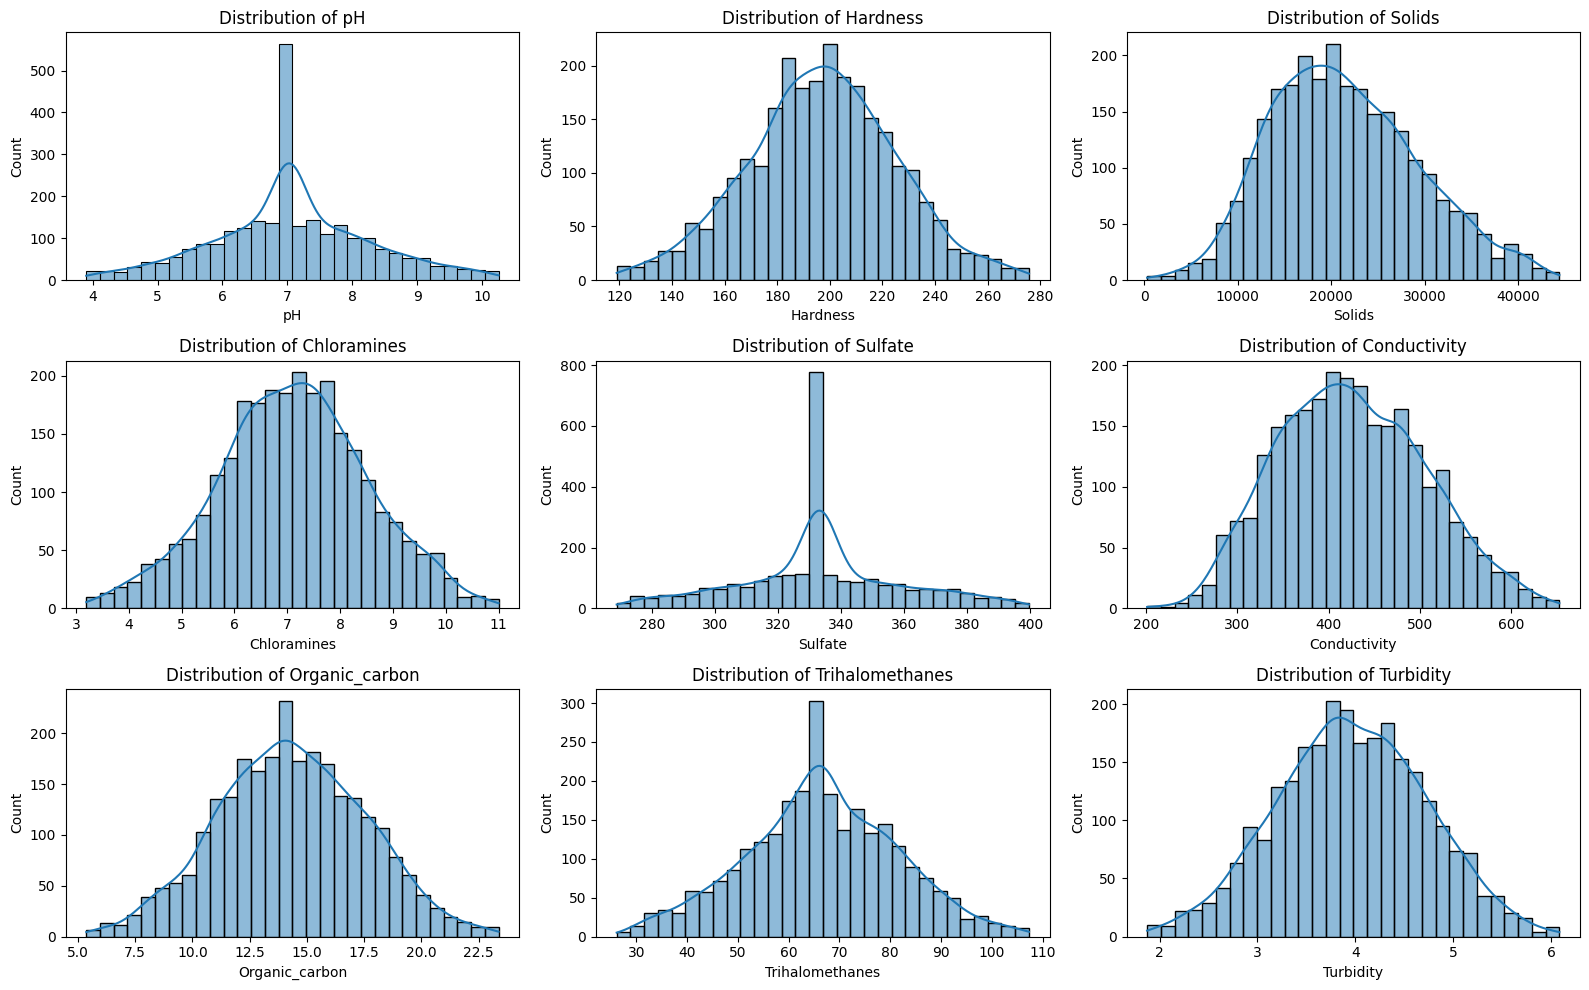

In [ ]:
plt.figure(figsize=(16,10))
for i,col in enumerate(num_cols):
  plt.subplot(3,3,i+1)
  sns.histplot(data[col],kde=True,bins=30)
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
plt.show()

<ipython-input-78-9ab7678308f2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Potability', y=col, data=data,palette=custom_palette)
<ipython-input-78-9ab7678308f2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Potability', y=col, data=data,palette=custom_palette)
<ipython-input-78-9ab7678308f2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Potability', y=col, data=data,palette=custom_palette)
<ipython-input-78-9ab7678308f2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

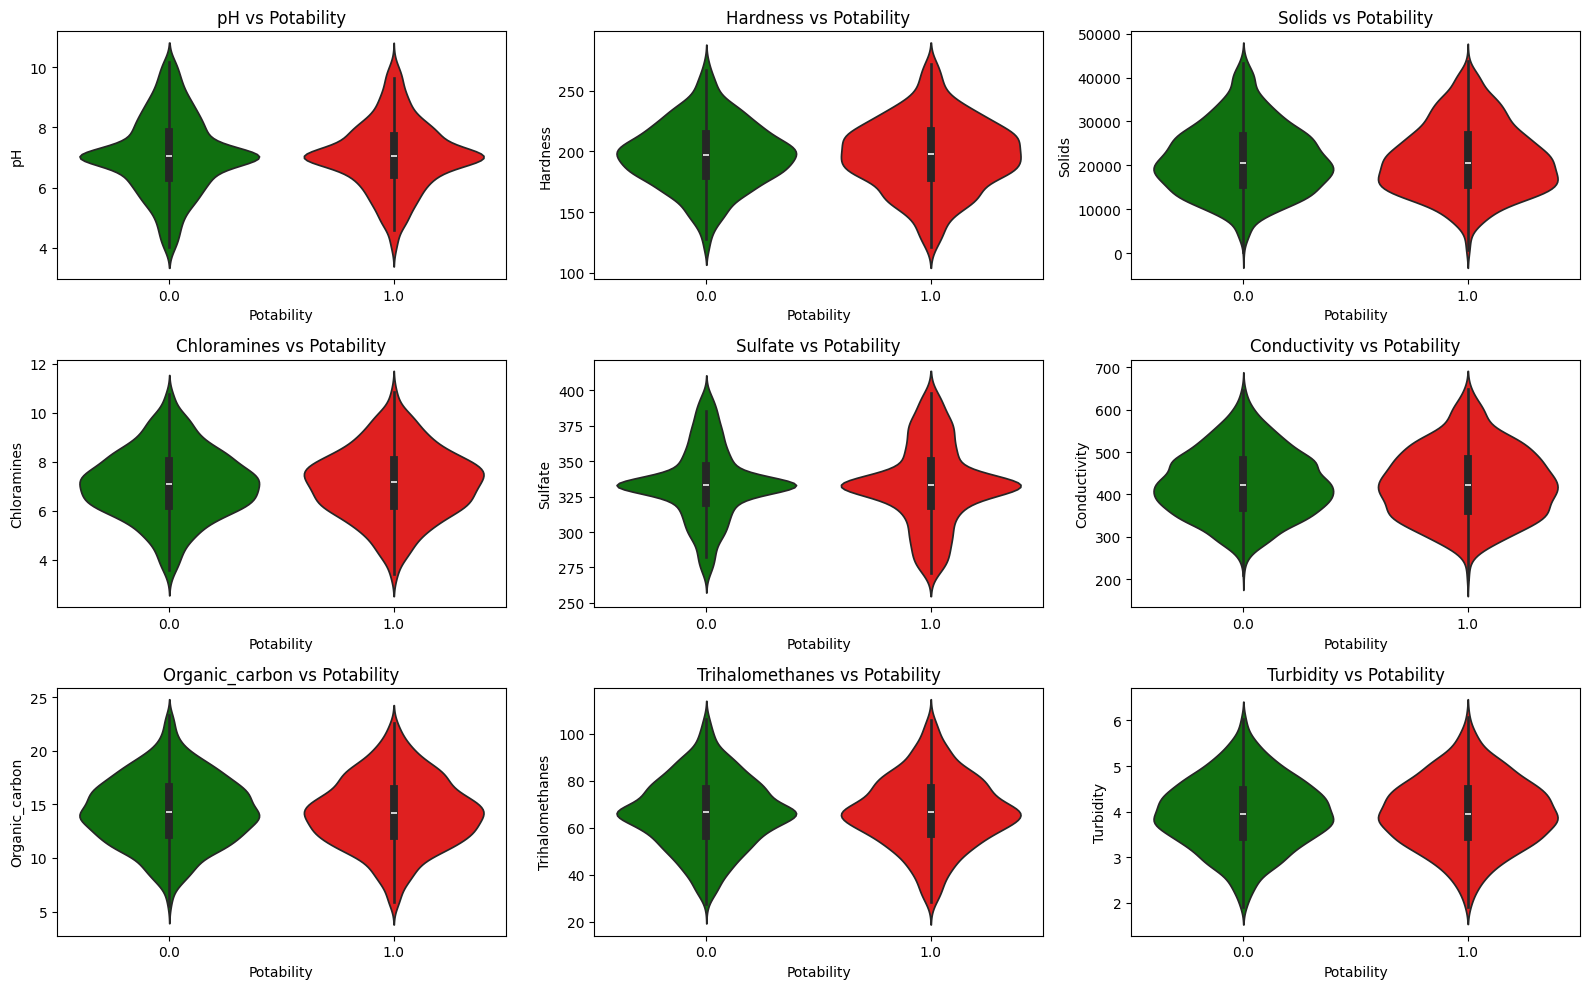

In [ ]:
custom_palette = ['green','red']
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(x='Potability', y=col, data=data,palette=custom_palette)
    plt.title(f'{col} vs Potability')
plt.tight_layout()
plt.show()

In [ ]:
 (data.groupby('Potability').mean())

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0.0,7.078421,196.994803,21421.976567,7.097131,333.910956,425.706363,14.401602,66.321652,3.959850
1.0,7.058791,196.974517,21538.548287,7.134885,333.272776,425.791078,14.200600,66.765457,3.966426


In [ ]:
# checking if there's any imbalance
value_count=data['Potability'].value_counts()
label_prct = (100 * (value_count / len(data))).apply(lambda x: '{:.2f}'.format(x))
label_prct

,count
Potability,
0.0,62.63
1.0,37.37


There's an imbalance in the label and action will be taken to rectify this issue

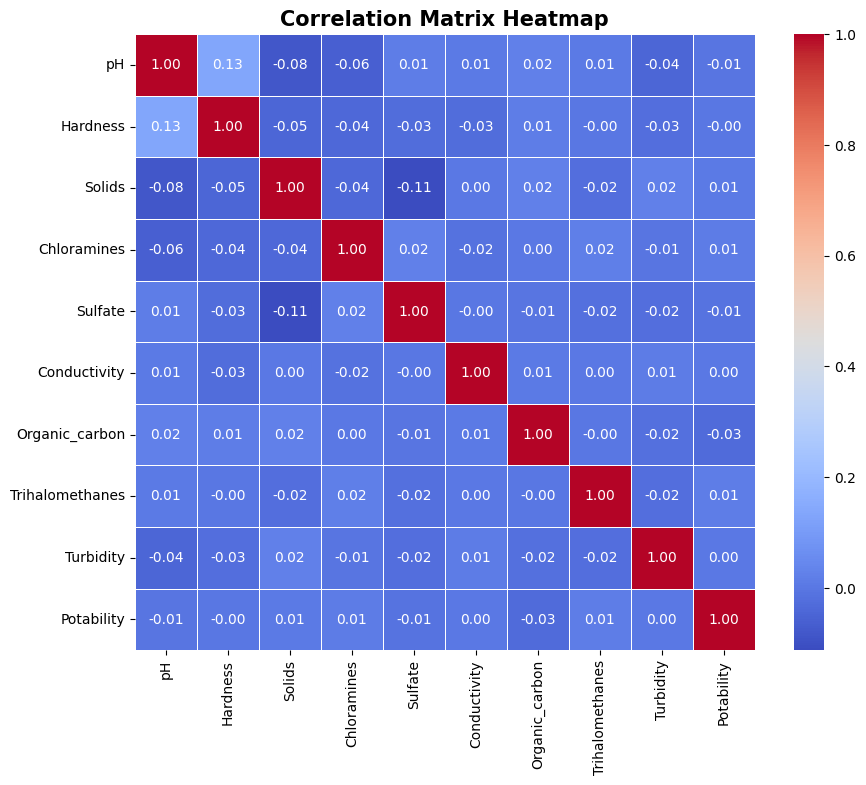

In [ ]:
# checking correaltion between columns to prevent overfitting
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap', fontsize=15, fontweight='bold')
plt.show()

## Model training

In [ ]:
#defining features and label
features = data.drop('Potability',axis=1)
label = data['Potability']

In [ ]:
features

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658


In [ ]:
label

,Potability
0,0.0
2,0.0
3,0.0
4,0.0
5,0.0
...,...
3270,1.0
3272,1.0
3273,1.0
3274,1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# splitting data into test and train for modelling
X_train, X_test, y_train, y_test = train_test_split( features, label, test_size=0.1, random_state=42,stratify=data['Potability'])

In [ ]:
X_train.shape, X_test.shape

((2391, 9), (266, 9))

In [ ]:
y_train.shape, y_test.shape

((2391,), (266,))

In [ ]:
#Combining x_train and y_train to make the train set
train_set=pd.concat([X_train,y_train],axis=1)

In [ ]:
#seperate majority and minority classes
majority_grp = train_set[train_set['Potability'] == 0]
minority_grp = train_set[train_set['Potability'] == 1]

In [ ]:
# Upsample minority class
from sklearn.utils import resample
minority_upsampled = resample(
    minority_grp,
    replace=True,
    n_samples=len(majority_grp),
    random_state=42)

In [ ]:
# Combine and shuffle
train_upsampled = pd.concat([majority_grp, minority_upsampled]).sample(frac=1, random_state=42)
X_train_resampled = train_upsampled.drop('Potability', axis=1) # Use parenthesis and axis=1 to drop columns
y_train = train_upsampled['Potability']

In [ ]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [ ]:
# Data is ready for model training
print("Class distribution after resampling:")
print(y_train.value_counts())

Class distribution after resampling:
Potability
1.0    1497
0.0    1497
Name: count, dtype: int64


## 1.Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [ ]:
log.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# training the model
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Evaluating the model
from sklearn import metrics
y_pred = log.predict(X_test)
print(f"Precision: {metrics.precision_score(y_test,y_pred):.2f}")
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.2f}")
print(f"Recall: {metrics.recall_score(y_test, y_pred):.2f}")
print(f"f1 score: {metrics.f1_score(y_test, y_pred):.2f}")

Precision: 0.37
Accuracy: 0.51
Recall: 0.44
f1 score: 0.40


In [ ]:
print("Classification report: ")
print(metrics.classification_report(y_test,y_pred))

Classification report: 
              precision    recall  f1-score   support

         0.0       0.63      0.55      0.59       167
         1.0       0.37      0.44      0.40        99

    accuracy                           0.51       266
   macro avg       0.50      0.50      0.49       266
weighted avg       0.53      0.51      0.52       266



## Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001,0.01, 0.1, 1, 10],
    'class_weight': ['balanced'],
    'penalty': ['l1','l2','elasticnet'],'fit_intercept': [True],
    'solver': ['saga'],'max_iter': [1,2,5,10],
'tol': [0.0001],'n_jobs': [-1]}

In [ ]:
grid_search = GridSearchCV(
    estimator=log,
    param_grid=param_grid,
    cv=5,
    scoring='f1')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': ['balanced'], 'fit_intercept': [True],
                         'max_iter': [1, 2, 5, 10], 'n_jobs': [-1],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga'], 'tol': [0.0001]},
             scoring='f1')

In [ ]:

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validated F1-score:", grid_search.best_score_)

Best Parameters: {'C': 0.001, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 2, 'n_jobs': -1, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.0001}
Best Cross-validated F1-score: 0.533481481114461


In [ ]:
lr_model = LogisticRegression(C=0.1, class_weight='balanced', fit_intercept=True, max_iter=1, n_jobs=-1, penalty='l1', solver='saga', tol=0.0001)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print(f"Precision: {metrics.precision_score(y_test,y_pred):.2f}")
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.2f}")
print(f"Recall: {metrics.recall_score(y_test, y_pred):.2f}")
print(f"f1 score: {metrics.f1_score(y_test, y_pred):.2f}")

Precision: 0.39
Accuracy: 0.50
Recall: 0.60
f1 score: 0.47


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.45      0.53       167
         1.0       0.39      0.60      0.47        99

    accuracy                           0.50       266
   macro avg       0.52      0.52      0.50       266
weighted avg       0.55      0.50      0.51       266



## 2.Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)
print(f"Precision: {metrics.precision_score(y_test,y_pred):.2f}")
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.2f}")
print(f"Recall: {metrics.recall_score(y_test, y_pred):.2f}")
print(f"f1 score: {metrics.f1_score(y_test, y_pred):.2f}")

Precision: 0.59
Accuracy: 0.65
Recall: 0.23
f1 score: 0.33


In [ ]:
print("Classification report: ")
print(metrics.classification_report(y_test,y_pred))

Classification report: 
              precision    recall  f1-score   support

         0.0       0.67      0.90      0.77       167
         1.0       0.59      0.23      0.33        99

    accuracy                           0.65       266
   macro avg       0.63      0.57      0.55       266
weighted avg       0.64      0.65      0.61       266



## Hyperparameter tuning



In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {
    'n_estimators': [425],'class_weight': [None, 'balanced'],'max_features': ['sqrt', 'log2', None],
    'max_depth': [18], 'min_samples_leaf': [1],  'min_samples_split': [2]}

In [ ]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': [None, 'balanced'], 'max_depth': [18],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [425]},
             scoring='f1')

In [ ]:
grid_search.best_params_

{'class_weight': None,
 'max_depth': 18,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 425}

In [ ]:
rf_tuned = RandomForestClassifier(n_estimators=425, class_weight='balanced', max_features='sqrt', max_depth=18, min_samples_leaf=1, min_samples_split=2,random_state=42)
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=18, n_estimators=425,
                       random_state=42)

In [ ]:
pred = rf_tuned.predict(X_test)
print(f"Precision: {metrics.precision_score(y_test,y_pred):.2f}")
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.2f}")
print(f"Recall: {metrics.recall_score(y_test, y_pred):.2f}")
print(f"f1 score: {metrics.f1_score(y_test, y_pred):.2f}")

Precision: 0.59
Accuracy: 0.65
Recall: 0.23
f1 score: 0.33


In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.90      0.77       167
         1.0       0.59      0.23      0.33        99

    accuracy                           0.65       266
   macro avg       0.63      0.57      0.55       266
weighted avg       0.64      0.65      0.61       266



## 3.GradientBoost classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient = GradientBoostingClassifier(random_state=42)

In [ ]:
gradient.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred = gradient.predict(X_test)
print(f"Precision: {metrics.precision_score(y_test,y_pred):.2f}")
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.2f}")
print(f"Recall: {metrics.recall_score(y_test, y_pred):.2f}")
print(f"f1 score: {metrics.f1_score(y_test, y_pred):.2f}")

Precision: 0.52
Accuracy: 0.64
Recall: 0.49
f1 score: 0.51


In [ ]:
print("Classification report: ")
print(metrics.classification_report(y_test,y_pred))

Classification report: 
              precision    recall  f1-score   support

         0.0       0.71      0.73      0.72       167
         1.0       0.52      0.49      0.51        99

    accuracy                           0.64       266
   macro avg       0.62      0.61      0.61       266
weighted avg       0.64      0.64      0.64       266



# Hyperparameter tuning

In [ ]:
gradient.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {'n_estimators':[300,450,500],
    'learning_rate' : [0.5,0.7],
    'max_depth': [3,5],
    'min_samples_split': [1,2],
    'min_samples_leaf': [1]}

In [ ]:
grid_search = GridSearchCV(estimator=gradient,
                           param_grid=param_grid,
                           verbose=0,
                           cv=5)
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.5, 0.7], 'max_depth': [3, 5],
                         'min_samples_leaf': [1], 'min_samples_split': [1, 2],
                         'n_estimators': [300, 450, 500]})

In [ ]:
grid_search.best_params_

{'learning_rate': 0.5,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [ ]:
tuned_gradient=GradientBoostingClassifier(learning_rate=0.5,
 max_depth=5,
 min_samples_leaf=1,
 min_samples_split=2,
 n_estimators=500,random_state=42)

In [ ]:
tuned_gradient.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=5, n_estimators=500,
                           random_state=42)

In [ ]:
pred = tuned_gradient.predict(X_test)
print("Precision: ", metrics.precision_score(y_test,pred))
print("Accuracy: ", metrics.accuracy_score(y_test, pred))
print("Recall: ", metrics.recall_score(y_test, pred))
print("f1 score: ", metrics.f1_score(y_test, pred))

Precision:  0.5370370370370371
Accuracy:  0.6428571428571429
Recall:  0.29292929292929293
f1 score:  0.3790849673202614


In [ ]:
pd.DataFrame(metrics.confusion_matrix(y_test, pred),
             columns=['Predicted Negative', 'Predicted Positive'],
             index=['Actual Negative', 'Actual Positive'])

,Predicted Negative,Predicted Positive
Actual Negative,142,25
Actual Positive,70,29


In [ ]:
print("Classification report: ")
print(metrics.classification_report(y_test,y_pred))

Classification report: 
              precision    recall  f1-score   support

         0.0       0.71      0.73      0.72       167
         1.0       0.52      0.49      0.51        99

    accuracy                           0.64       266
   macro avg       0.62      0.61      0.61       266
weighted avg       0.64      0.64      0.64       266

